In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# <center> Бронза

поставьте стиль matplolib как seaborn

In [2]:
plt.style.use('seaborn')

### <center> PCA

In [3]:
from sklearn.datasets import load_digits

Импортируйте PCA с sklearn 

In [4]:
from sklearn.decomposition import PCA

Загрузите данные с помощью **load_digits** и получите ваши **X** и **y**

In [5]:
digits = load_digits()

In [6]:
X = digits.data
y = digits.target

Снизьте размерность данных до 2 с помощью PCA

In [7]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

Нарисуйте выборку со сниженной размерностью

Покажите colorbar, разметьте цветами разные классы разными цветами

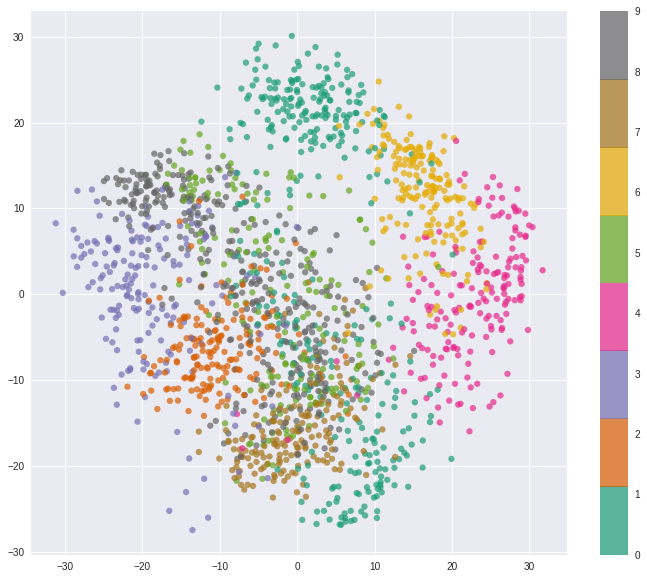

In [8]:
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap='Dark2')
plt.colorbar();

Полученная картинка позволяет увидеть зависимости между различными цифрами. Например, цифры 0 и 6 располагаются в соседних кластерах, что говорит об их схожем написании. Наиболее "разбросанный" (по другим кластерам) – это кластер, соответствующий цифре 8, что говорит о том, что она имеет много различных написаний, делающих её схожей со многими другими цифрами.

   Покажите как выглядят первые две главные компоненты. Используйте imshow из matplotlib и выберите 'binary' cmap, также не забудьте убрать прорисовку горизонтальной и вертикальной оси

[[], [], Text(0.5,1,'Вторая компонента')]

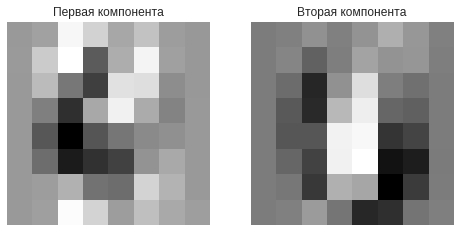

In [9]:
fig, ax = plt.subplots(1, 2, sharey=True)
im1 = pca.components_[0]
ax[0].imshow(im1.reshape((8, 8)), cmap='binary')
ax[0].set(xticks=[], yticks=[], title='Первая компонента')

im2 = pca.components_[1]
ax[1].imshow(im2.reshape((8, 8)), cmap='binary')
ax[1].set(xticks=[], yticks=[], title='Вторая компонента')

Разделите на train и тест, размер тестовой выборки 20% и random_state 123

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Используйте Grid Search чтобы обучить KNN с оптимальным кол-вом соседей на данных. Не пробуйте кол-во соседей больше 50

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
params = {'kneighborsclassifier__n_neighbors': range(2, 50)}

In [14]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [15]:
knn_pipe

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [16]:
grid = GridSearchCV(knn_pipe, param_grid=params, n_jobs=-1)

In [17]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'kneighborsclassifier__n_neighbors': range(2, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Какой score у лучшего KNN  на тестовой выборке?

In [18]:
best_knn = grid.best_estimator_

In [19]:
grid.best_params_

{'kneighborsclassifier__n_neighbors': 3}

In [20]:
grid.best_score_

0.9693806541405706

In [21]:
best_knn.score(X_test, y_test)

0.975

# <center> Серебро

### Постройте алгоритмы кластеризации на тех же данных

Сперва мы будем отпимизировать MiniBatchKmeans

Используйте метод локтя, чтобы выбрать оптимальное количество кластеров. Параметры алгоритма и данные используем те же, что раньше, меняем только `n_clusters`.

Используйте метод локтя, чтобы выбрать оптимальное количество кластеров. Параметры алгоритма и данные используем те же, что раньше, меняем только n_clusters.

In [22]:
from sklearn.cluster import MiniBatchKMeans, KMeans

In [23]:
%%time
inertia = []
for k in range(1, 30):
    kmeans  = KMeans(n_clusters=k, random_state=123, init='k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

CPU times: user 22.4 s, sys: 342 ms, total: 22.7 s
Wall time: 6.28 s


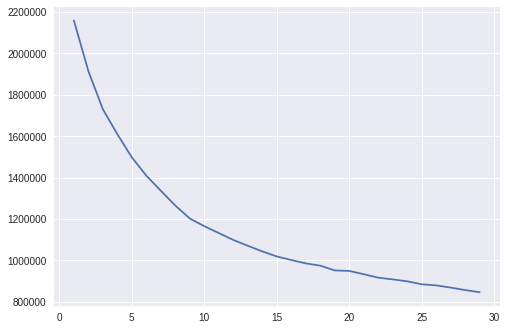

In [24]:
plt.plot(range(1, 30), inertia);

Какое количество кластеров оптимально выбрать, согласно методу локтя?

In [ ]:
10

Попробуем еще один метод кластеризации– агломеративную кластеризацию.

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
ag_cl = AgglomerativeClustering(n_clusters=10)

In [27]:
ag_cl.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func=<function mean at 0x7fb1b42546a8>)

Посчитайте Adjusted Rand Index (`sklearn.metrics`) для получившегося разбиения на кластеры и для `KMeans` с параметрами  из прошлого вопроса

In [28]:
from sklearn.metrics import adjusted_rand_score

In [29]:
adjusted_rand_score(y, ag_cl.labels_)

0.7940031835568753

In [30]:
kmeans = KMeans(n_clusters=10, random_state=123, init='k-means++')

In [31]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [32]:
adjusted_rand_score(y, kmeans.labels_)

0.6657344194130749

In [33]:
adjusted_rand_score(kmeans.labels_, ag_cl.labels_)

0.6908744269658987

# <center> Золото

In [34]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn import metrics

In [35]:
categories = [
     'comp.graphics',
     'sci.med',
     'sci.space',
     'soc.religion.christian',
     'talk.politics.guns']

Загрузите данные с помощью функции fetch_20newsgroups используйте категории categories

In [36]:
dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

In [37]:
dataset.keys()

dict_keys(['target_names', 'description', 'filenames', 'DESCR', 'data', 'target'])

In [38]:
print("{} categories".format(dataset.target_names))

['comp.graphics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns'] categories


In [39]:
labels = dataset.target
true_k = np.unique(labels).shape[0]

**Закодируем тексты с помощью TF-IDF признаков.**

Закодируйте данные с помощью tf-idf с параметрами max_df = 0.5, min_df = 5, stop_words='english', max_features=1500

Почитайте что что такое stopwords

In [40]:
tfidf = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

In [41]:
X = tfidf.fit_transform(dataset.data)

Примените к данным KMeans, параметры - n_clusters - количество категорий, kmeans++, максимальное кол-во итераций 150, random_state=123

In [42]:
kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=150, n_jobs=-1, random_state=123)

In [45]:
%%time
kmeans.fit(X)

CPU times: user 122 ms, sys: 28.2 ms, total: 150 ms
Wall time: 34.6 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
    n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

Посчитайте silhouette_score на данных, посчитайте больше про silhouette score в документации sklearn

In [47]:
print("Silhouette Coefficient: {:.3f}".format(metrics.silhouette_score(X, kmeans.labels_, sample_size=1000)))

Silhouette Coefficient: 0.017
